<a href="https://colab.research.google.com/github/VishnudevButla/FMML_Labs_and_Projects/blob/main/AIML_Module_4_Lab_3_Gradient_Descent_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [187]:
import numpy as np
import matplotlib.pyplot as plt

In [188]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [189]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

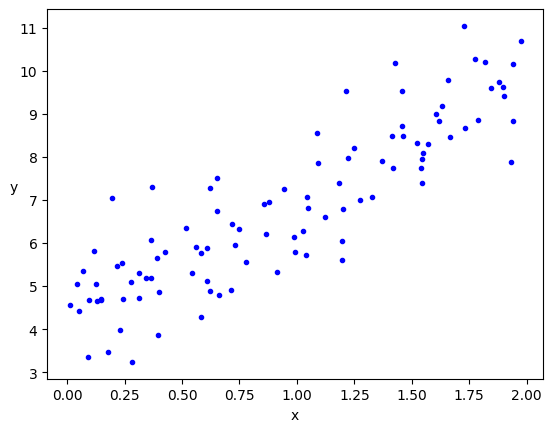

In [190]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [191]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [192]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [193]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 3.903
y_pred[1]: 3.046
Final error: 4180.375


Plotting the error vs Number of iterations

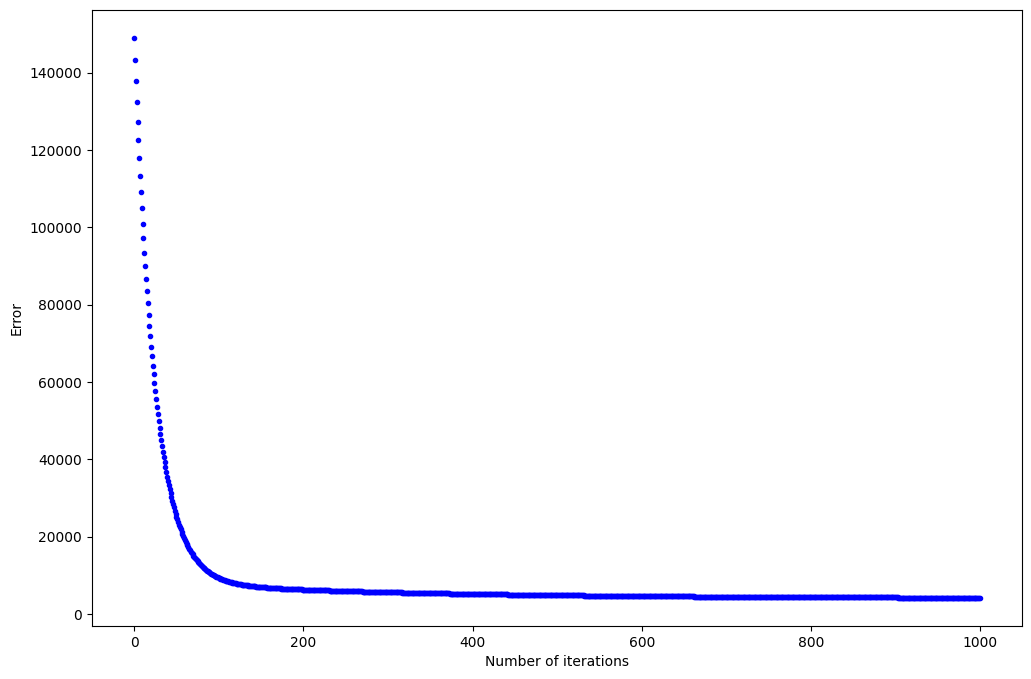

In [194]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

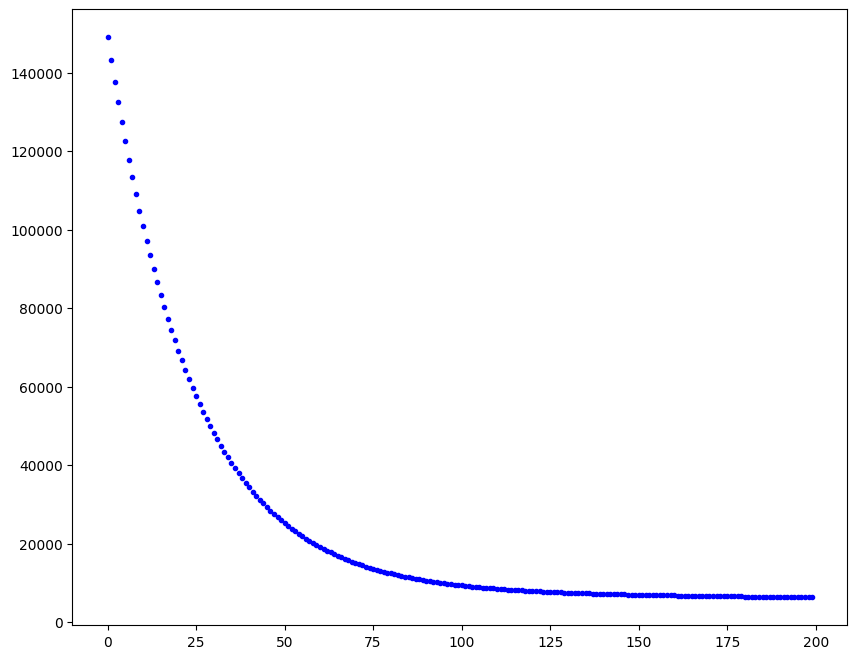

In [195]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [196]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [197]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.121
y_pred[1]: 2.755
Final error: 41.313


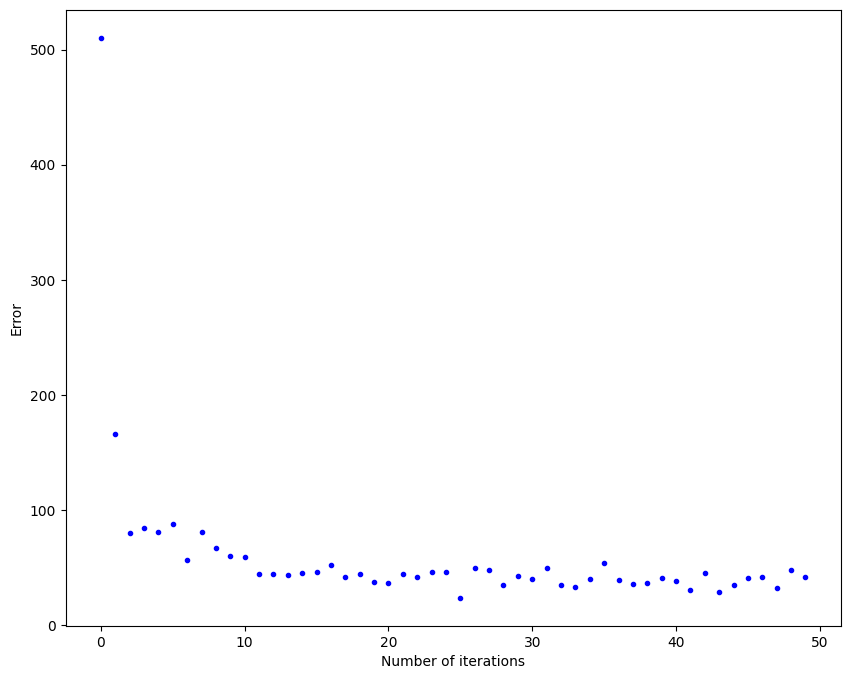

In [198]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [199]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [200]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.148
y_pred[1]: 2.827
Final error: 807.488


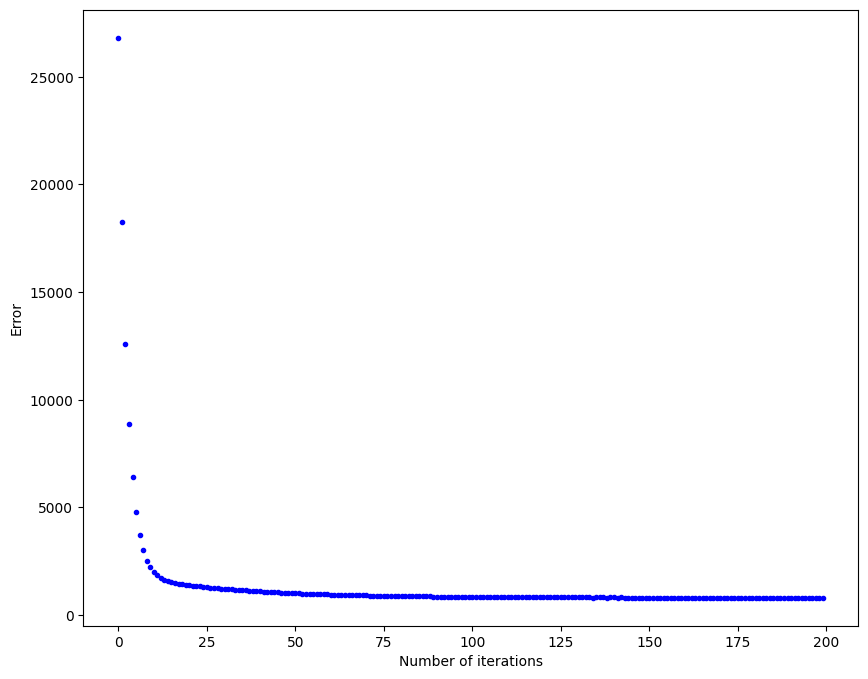

In [201]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

y_pred[0]: 4.248
y_pred[1]: 2.741
Final error: 2010.278


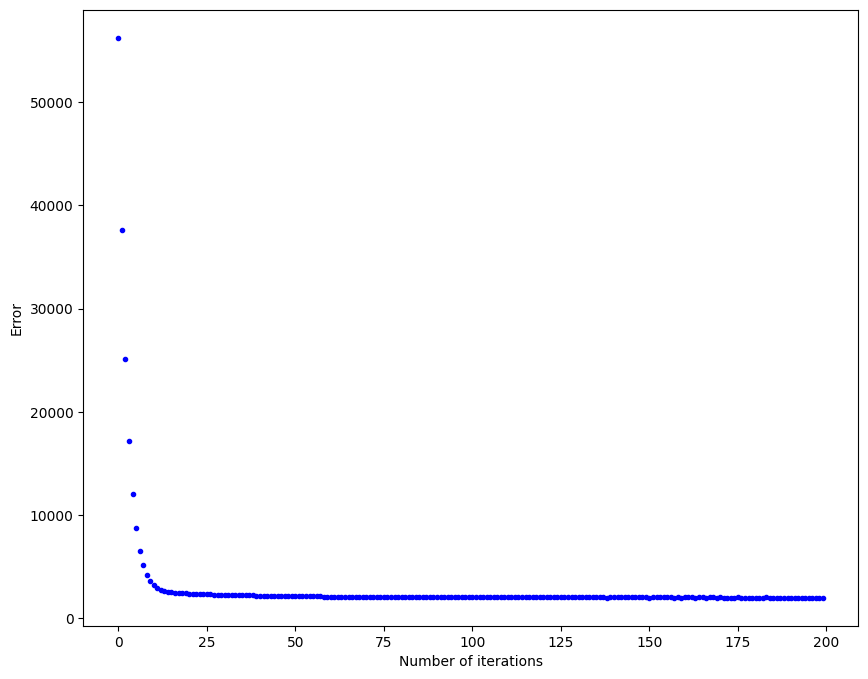

In [202]:
#1)
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter,50)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')





---
**A3)**


For Minibatch (Type 3) gradient descent:-

y_pred[0]: 4.218
y_pred[1]: 2.759
Final error: 803.120

For stochastic(type 2) gradient descent:-

y_pred[0]: 4.231
y_pred[1]: 2.852
Final error: 41.302

For type 1 Gradient descent:-

y_pred[0]: 4.215
y_pred[1]: 2.770
Final error: 4032.923


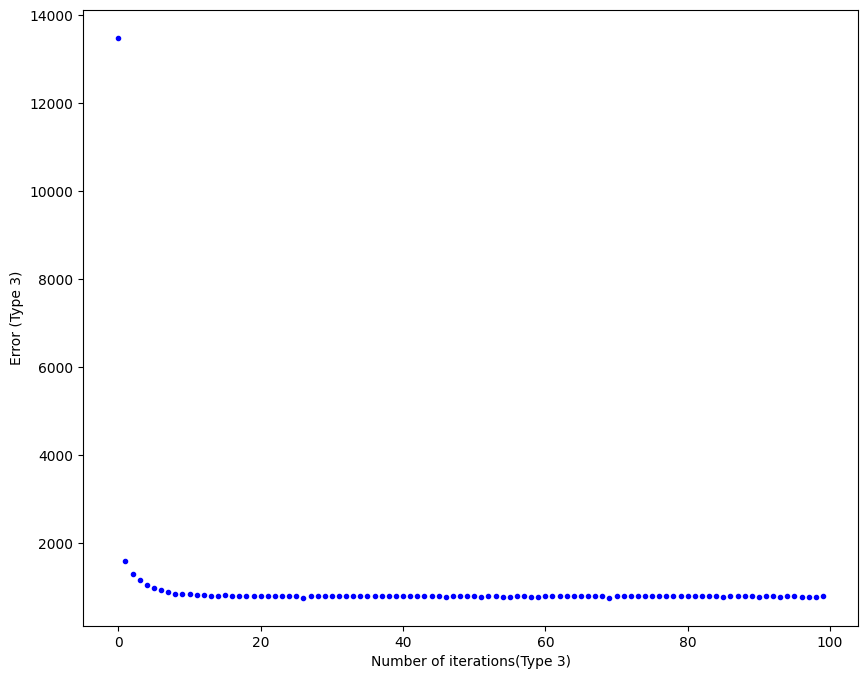

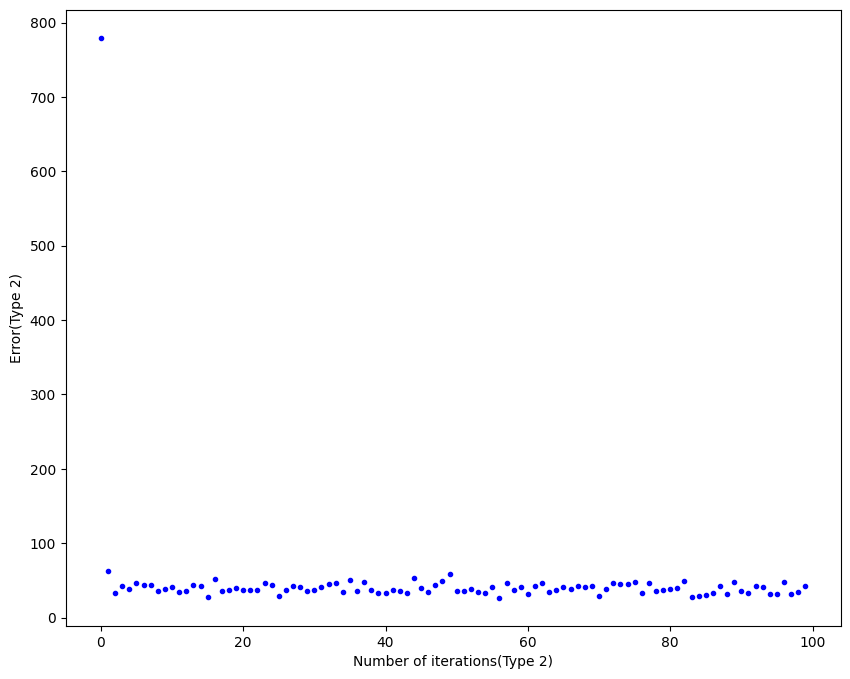

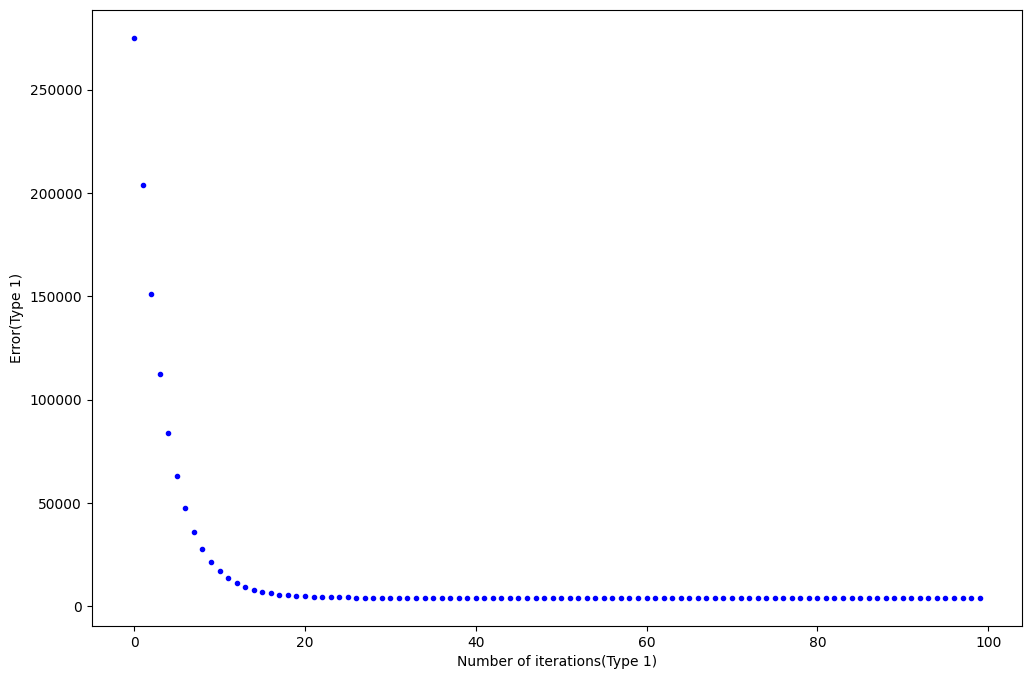

In [205]:
#3)All the functions used below are defined in the above cells.
# Part 1:Increasing learning rate

#Minibatch gradient descent
lr = 0.9
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)
print("\nFor Minibatch (Type 3) gradient descent:-\n")
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error (Type 3)')
ax.set_xlabel('Number of iterations(Type 3)')
y_pred = np.random.randn(2,1)

ax.plot(range(100), cost_history[:100], 'b.')#zoomed in

#Stochastic gradient descent
lr = 0.9
n_iter = 200
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]

y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)
print("\nFor stochastic(type 2) gradient descent:-\n")
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error(Type 2)')
ax.set_xlabel('Number of iterations(Type 2)')
y_pred = np.random.randn(2,1)

ax.plot(range(100), cost_history[:100], 'b.')#zoomed in

#Type 1 gradient descent
lr = 0.9
n_iter = 200

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)
print("\nFor type 1 Gradient descent:-\n")

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error(Type 1)')
ax.set_xlabel('Number of iterations(Type 1)')
ax.plot(range(100), cost_history[:100], 'b.')#zoomed in


For Minibatch (Type 3) gradient descent:-

y_pred[0]: 3.042
y_pred[1]: 3.724
Final error: 1202.529

For stochastic(type 2) gradient descent:-

y_pred[0]: 3.919
y_pred[1]: 2.952
Final error: 57.159

For Batch(Type 1) Gradient descent:-

y_pred[0]: 3.977
y_pred[1]: 2.136
Final error: 8217.547


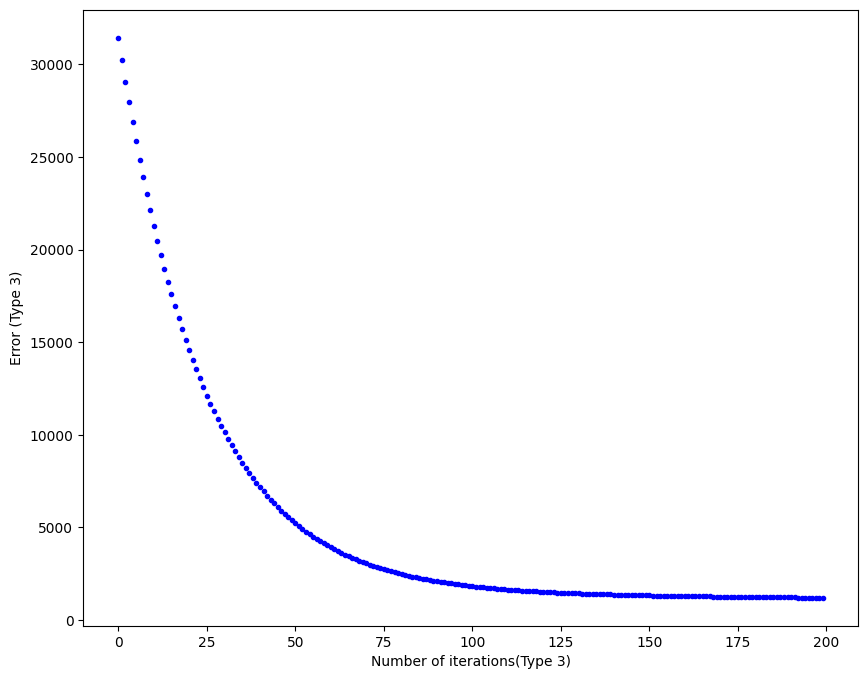

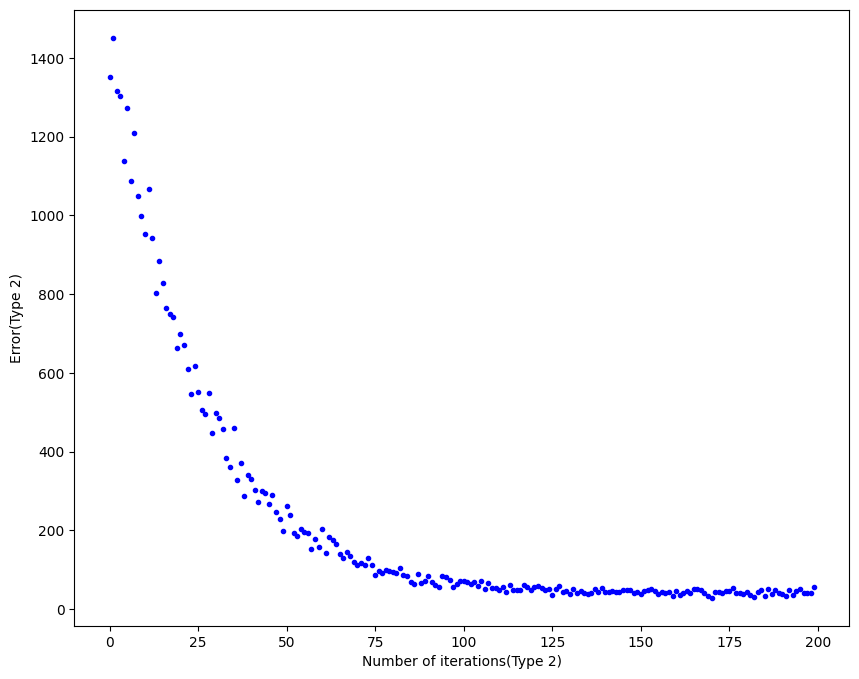

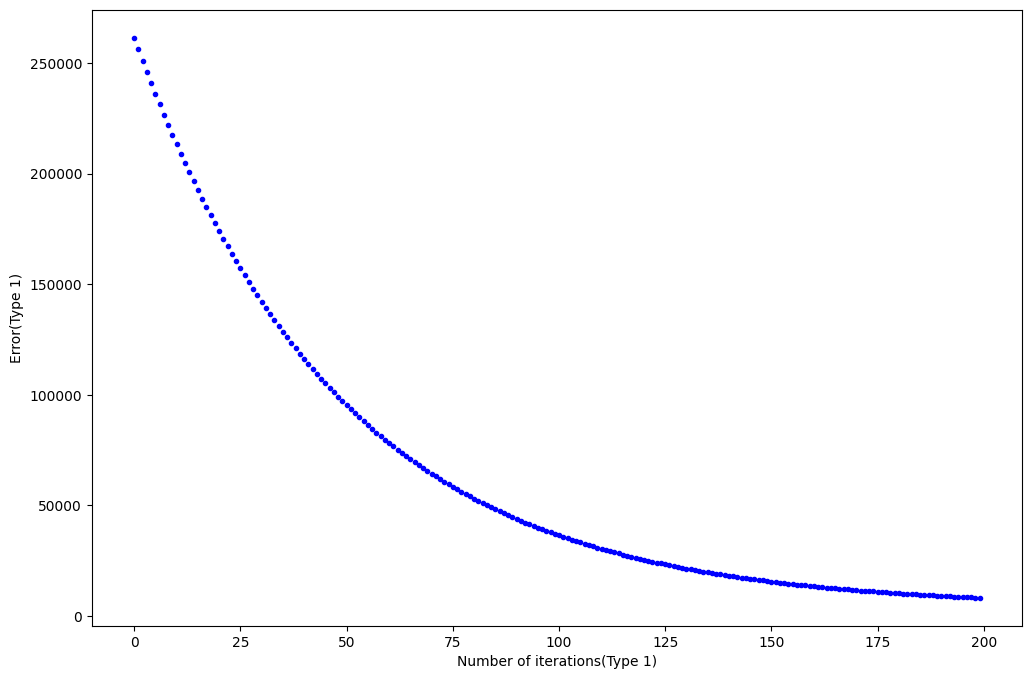

In [166]:
##A3)Decreasing learning rate
#Minibatch gradient descent
lr = 0.01
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)
print("\nFor Minibatch (Type 3) gradient descent:-\n")
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error (Type 3)')
ax.set_xlabel('Number of iterations(Type 3)')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

#Stochastic gradient descent
lr = 0.01
n_iter = 200
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]

y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)
print("\nFor stochastic(type 2) gradient descent:-\n")
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error(Type 2)')
ax.set_xlabel('Number of iterations(Type 2)')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

#Type 1 gradient descent
lr = 0.005
n_iter = 200

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)
print("\nFor Batch(Type 1) Gradient descent:-\n")

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error(Type 1)')
ax.set_xlabel('Number of iterations(Type 1)')

ax.plot(range(n_iter), cost_history, 'b.')

***Observations:-***
**For Stochastic Gradient Descent (SGD) and Mini-batch Gradient Descent:**

*Higher Learning Rate:* With a higher learning rate, errors are minimized more effectively, and both mini-batch gradient descent and SGD quickly converge and saturate near zero. However, there is a point where the number of iterations is minimal, and the error peaks.

*Lower Learning Rate:* As the learning rate decreases, the error is initially higher for fewer iterations. With an increasing number of iterations, errors gradually decrease, indicating slower but steady convergence.

**For Batch Gradient Descent:**

*Lower Learning Rate:* The graph shows a gradual reduction in errors with a lower learning rate. This demonstrates a steady and consistent convergence towards the global minimum.

*Higher Learning Rate:* The graph for a higher learning rate shows a sudden decrease in errors. This indicates rapid convergence but may also suggest the possibility of overshooting the global minimum if the learning rate is too high.



---

**A2)**


For Batch Gradient Descent:

y_pred[0]: 1.240
y_pred[1]: 0.134
Final error: 0.840


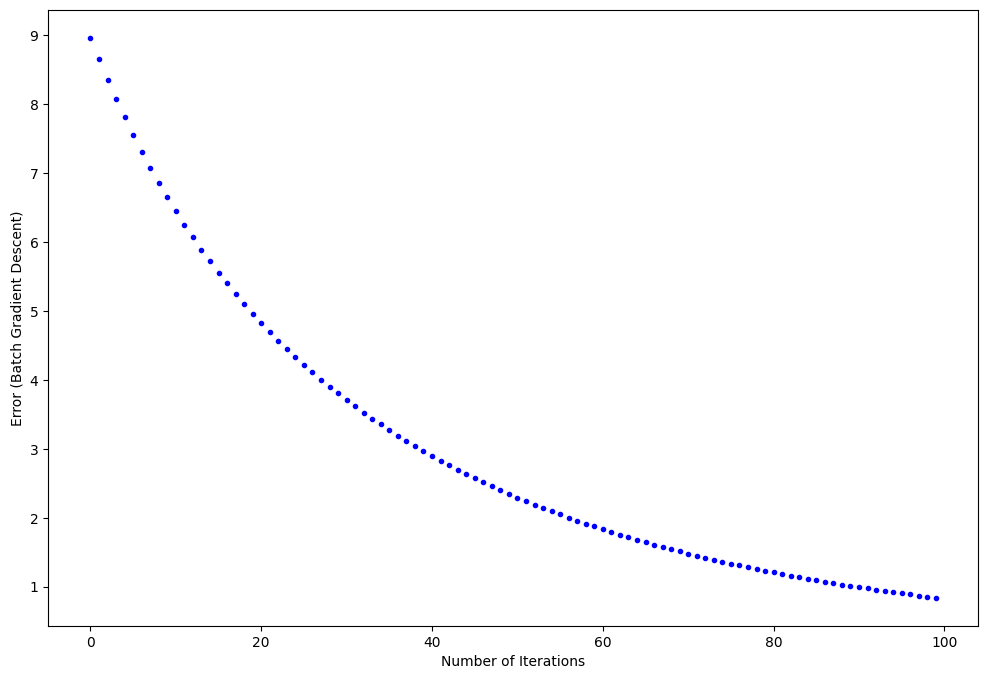


For Mini-batch Gradient Descent:

y_pred[0]: 1.050
y_pred[1]: 0.029
Final error: 1.964


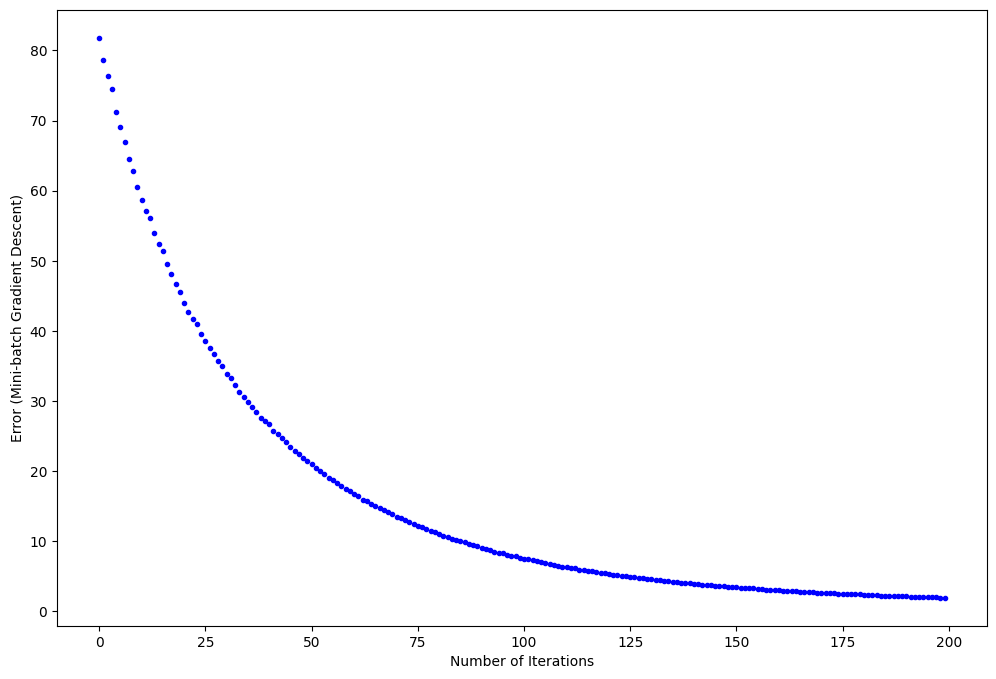


For Stochastic Gradient Descent:

y_pred[0]: 1.417
y_pred[1]: 0.219
Final error: 465.920


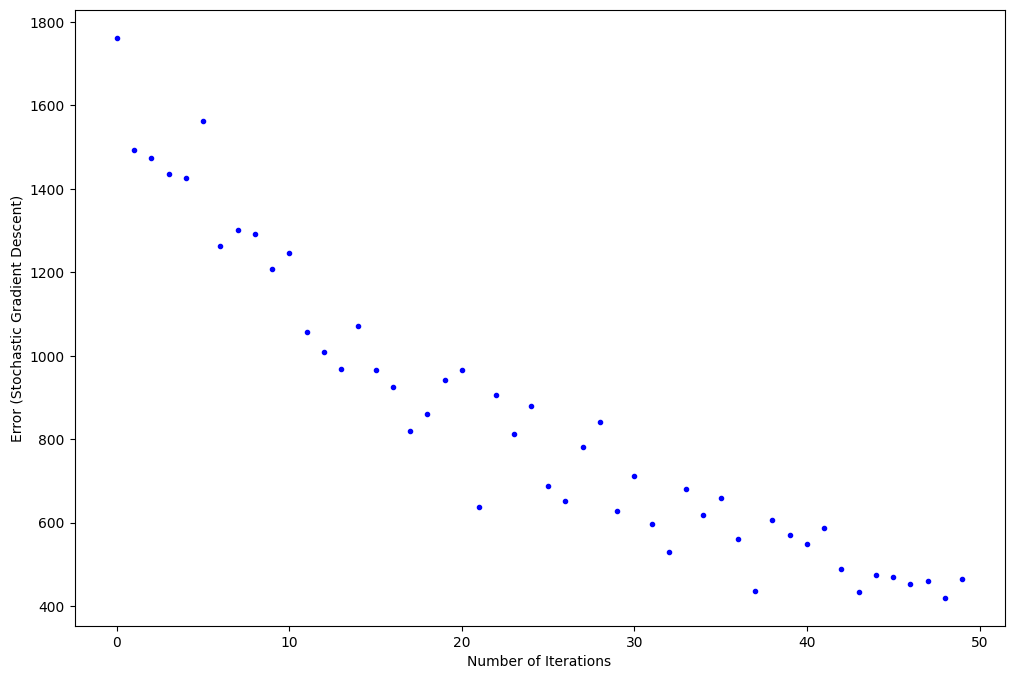

In [167]:
#A2)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

def cal_cost(y_pred, X, y):
    m = len(y)
    predictions = X.dot(y_pred)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, len(y_pred)))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it, :] = y_pred.T
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

def stochastic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=50):
    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0, m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1, 1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=200, batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(np.ceil(m / batch_size))

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it] = cost

    return y_pred, cost_history

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target.reshape(-1, 1)

# Standardize
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

# Add column
X = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

# Batch Gradient Descent
np.random.seed(0)
y_pred = np.random.randn(X.shape[1], 1)
lr = 0.01
itr = 100
y_pred, cost_history, y_pred_history = gradient_descent(X, y, y_pred, lr, itr)

print("\nFor Batch Gradient Descent:\n")
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('Error (Batch Gradient Descent)')
ax.set_xlabel('Number of Iterations')
ax.plot(range(itr), cost_history, 'b.')
plt.show()

# Mini-batch Gradient Descent
np.random.seed(0)
y_pred = np.random.randn(X.shape[1], 1)
n_iter = 200
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size=20)

print("\nFor Mini-batch Gradient Descent:\n")
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('Error (Mini-batch Gradient Descent)')
ax.set_xlabel('Number of Iterations')
ax.plot(range(n_iter), cost_history, 'b.')
plt.show()

# Stochastic Gradient Descent
np.random.seed(0)
y_pred = np.random.randn(X.shape[1], 1)
n_iter = 50
y_pred, cost_history = stocashtic_gradient_descent(X, y, y_pred, lr, n_iter)

print("\nFor Stochastic Gradient Descent:\n")
print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('Error (Stochastic Gradient Descent)')
ax.set_xlabel('Number of Iterations')
ax.plot(range(n_iter), cost_history, 'b.')
plt.show()


## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

###Answers
Of the given statements only (v) holds true.
This is because Batch Gradient Descent uses the entire dataset to compute the gradient,hence the convergence process is stable and there is a guarantee for it to reach the global optimum for convex functions for an optimal learning rate.
Although SGD updates the parameters using individual data points, it can still reach the global optimum for convex functions. The noise introduced by using single points can help escape local minima in non-convex functions, but in convex functions, it eventually converges to the global optimum, given an appropriate learning rate and enough iterations.
